In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
%load_ext autoreload
import glob
np.random.seed(2) 
torch.manual_seed(2)

In [3]:
%autoreload

## load a checkpoint & dataset the network trained on

In [7]:
lcs = utils.get_data('../../datasets/ZTF_gri',min_length=25,keep_missing=False)


found 3408 for band='r'
found 3408 for band='i'
found 3408 for band='g'
max time:  1687.1758
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(1527, 3, 4396, 3)
train size: 1374, valid size: 275, test size: 153


In [25]:
lcs = utils.get_data('../../datasets/ZTF_gri',min_length=0,keep_missing=True)

found 3408 for band='r'
found 3408 for band='i'
found 3408 for band='g'


/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/dataset.py:167: RuntimeWarning: divide by zero encountered in true_divide
  lc[:,2] = lc[:,2] / np.std(lc[:,1])


max time:  1687.1758
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(3177, 3, 4396, 3)
train size: 2859, valid size: 572, test size: 318


In [5]:
files = glob.glob('../checkpoints/keep_rm/NGC5548/*')
#files = glob.glob('../checkpoints/keep_rm/3C273/*')
files

['../checkpoints/keep_rm/NGC5548/ZTF_NGC5548-1.2454980611801147.h5',
 '../checkpoints/keep_rm/NGC5548/ZTF_NGC5548-1.2497953176498413.h5']

In [8]:
net,optimizer,scheduler,lrs, args, epoch, losses = utils.load_checkpoint(files[0], lcs.data_obj)

=> loading checkpoint '../checkpoints/keep_rm/NGC5548/ZTF_NGC5548-1.2454980611801147.h5'
Namespace(data_folder='/home2/fggr82/astr/hetast/src/datasets/ZTF_NGC5548', checkpoint='/home2/fggr82/astr/hetast/src/datasets/ZTF_gri0.8933992385864258.h5', seed=2, device='mps', shuffle=False, start_col=1, test_split=0.2, sep=',', net='HeTVAE', mixing='concat', n_union_tp=3500, embed_time=128, num_heads=8, latent_dim=64, num_ref_points=16, rec_hidden=128, width=512, niters=100000, patience=100000, batch_size=2, k_iwae=1, lr=5e-05, beta1=0.9, beta2=0.999, scheduler=True, warmup=10, reset=True, factor=0.9, lr_patience=500, threshold=0.01, dropout=0.1, inc_errors=False, frac=0.5, mse_weight=5.0, kl_annealing=False, kl_itrs=6000, n_cycles=32, start=0.0, stop=0.8, ratio=0.5, keep_missing=False, min_length=1, print_at=100, save_at=2000, kl_zero=False, const_var=False, var_per_dim=False, num_resamples=12, is_bounded=True)


In [15]:
losses[0]

[[1.2958282232284546,
  0.8115040063858032,
  0.2608198821544647,
  0.08533333333333336],
 [1.216299057006836,
  0.7153002619743347,
  0.046854011714458466,
  0.17066666666666672],
 [1.1578271389007568,
  0.6463592052459717,
  0.05440811812877655,
  0.25600000000000006],
 [1.122684359550476,
  0.6123874187469482,
  0.057198405265808105,
  0.34133333333333343],
 [1.0989432334899902,
  0.5903895497322083,
  0.04590829834342003,
  0.4266666666666668],
 [1.079170823097229,
  0.574858546257019,
  0.03652338311076164,
  0.5120000000000001],
 [1.0673218965530396,
  0.5663257837295532,
  0.03065885789692402,
  0.5973333333333329],
 [1.053786039352417,
  0.5509529709815979,
  0.026417966932058334,
  0.6826666666666658],
 [1.042594313621521,
  0.5424247980117798,
  0.021144501864910126,
  0.7679999999999986],
 [1.0364463329315186, 0.5374640226364136, 0.017506953328847885, 0.8],
 [1.0327701568603516, 0.5342197418212891, 0.01468551903963089, 0.8],
 [1.0254182815551758, 0.5290420055389404, 0.013627

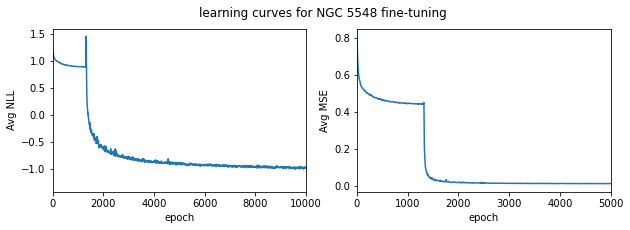

In [80]:
fig, ax = plt.subplots(1,2,figsize=[10,3])
ax[0].plot(x,train_l[:,0])
ax[0].set_xlim(0,10000)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Avg NLL')
ax[1].plot(x,train_l[:,1])
ax[1].set_xlim(0,5000)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Avg MSE')
fig.suptitle('learning curves for NGC 5548 fine-tuning')
np.array(losses[0]).shape
plt.savefig('../img/learning_curves/retrain_NGC5548.pdf')

In [49]:
train_l[:,1][160]

0.031542159616947174

=> loading checkpoint '../checkpoints/keep_rm/NGC5548/ZTF_NGC5548-1.2454980611801147.h5'
Namespace(data_folder='/home2/fggr82/astr/hetast/src/datasets/ZTF_NGC5548', checkpoint='/home2/fggr82/astr/hetast/src/datasets/ZTF_gri0.8933992385864258.h5', seed=2, device='mps', shuffle=False, start_col=1, test_split=0.2, sep=',', net='HeTVAE', mixing='concat', n_union_tp=3500, embed_time=128, num_heads=8, latent_dim=64, num_ref_points=16, rec_hidden=128, width=512, niters=100000, patience=100000, batch_size=2, k_iwae=1, lr=5e-05, beta1=0.9, beta2=0.999, scheduler=True, warmup=10, reset=True, factor=0.9, lr_patience=500, threshold=0.01, dropout=0.1, inc_errors=False, frac=0.5, mse_weight=5.0, kl_annealing=False, kl_itrs=6000, n_cycles=32, start=0.0, stop=0.8, ratio=0.5, keep_missing=False, min_length=1, print_at=100, save_at=2000, kl_zero=False, const_var=False, var_per_dim=False, num_resamples=12, is_bounded=True)
------------------------------------
args.factor=0.9
[-1.2454980611801147, 0.01017

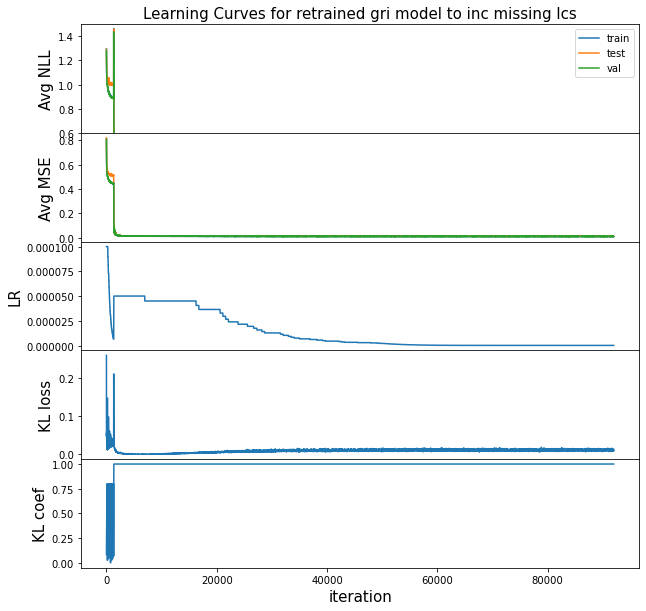

In [33]:
for file in files[:1]:
    net,optimizer,scheduler,lrs, args, epoch, losses = utils.load_checkpoint(file, lcs.data_obj)
    print('------------------------------------')
    print(f'{args.factor=}')
    print(losses[0][-1])
    print('------------------------------------')
    train_l = np.array(losses[0])
    val_l = np.array(losses[1])
    test_l = np.array(losses[2])
    fs = 15
    fig, ax = plt.subplots(5, figsize=(10,10))
    ax[0].set_title('Learning Curves for retrained gri model to inc missing lcs',fontsize=fs)
    ax[2].set_xlabel('Epoch',fontsize=fs)
    print(ax)
    ## NLL
    x = np.arange(0,len(train_l)*10,10) # took metrics every 10 itrs
    ax[0].plot(x,train_l[:,0], label='train')
    ax[0].plot(x,test_l[:,0], label='test')
    ax[0].plot(x,val_l[:,0], label='val')
    ax[0].set_ylim(0.6,1.5)
    ax[0].legend(loc="upper right")
    ax[0].set_ylabel('Avg NLL',fontsize=fs)
    ## MSE
    ax[1].plot(x, train_l[:,1], label='train')
    ax[1].plot(x, test_l[:,1], label='test')
    ax[1].plot(x,val_l[:,1], label='val')
    ax[1].set_ylabel('Avg MSE',fontsize=fs)
    ## learning rate
    ax[3].plot(x,train_l[:,2])
    ax[3].set_ylabel('KL loss',fontsize=fs)
    ## KL Annealing
    ax[2].plot(lrs)
    ax[2].set_ylabel('LR',fontsize=fs)
    try:
        ax[4].plot(x,train_l[:,3])
        ax[4].set_ylabel('KL coef',fontsize=fs)
        ax[4].set_xlabel('iteration',fontsize=fs)
    except Exception:
        pass
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('../img/learning_curves/gri_retrain_missing')

In [ ]:
factor 0.9 
    increase number of KL cycles
    increase patience slgihtly 
    try less weight on MSE

# Plot Learning curves